<div style="float:left">
    <h1 style="width:600px">Assessment</h1>
    <h3 style="width:600px">CASA0002: Urban Simulation</h3>
    <h3 style="width:600px">Author: Andres Restrepo</h3>

</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

## Required libraries

In [1]:
import timeit
start_time = timeit.default_timer()
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set_theme()

## Data reading

### Underground network

In [3]:
G = nx.read_graphml('Data/Inputs/london.graph')

In [4]:
type(G)

networkx.classes.graph.Graph

### OD matrix

In [5]:
OD = pd.read_csv('Data/Inputs/OD_matrix.csv',index_col='station_origin')
OD.rename_axis('station_destination', axis=1,inplace=True)

In [6]:
type(OD)

pandas.core.frame.DataFrame

### Flow data

In [7]:
london_OD_AMpeak = pd.read_csv('Data/Inputs/london_flows.csv')

In [8]:
type(london_OD_AMpeak)

pandas.core.frame.DataFrame

## Data inspection

### Underground network

In [9]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_1895/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [10]:
list(G.nodes(data = True))[0]

('Liverpool Street', {'coords': '(533127.7645573226, 181621.32983581326)'})

In [11]:
# #check that all distances are greater or equal to euclidean distance
# for u,v, data in G.edges(data=True):
#     assert(data['length'] >= distance.euclidean(pos[u], pos[v]))

In [12]:
#if want to know what is the maximum distance between stations
max(dict(G.edges).items(), key=lambda x: x[1]['length'])

(('Wembley Park', 'Finchley Road'),
 {'length': 7266.373927496304, 'line_name': 'Metropolitan', 'flows': 55124})

In [13]:
#if want to know to which stations Baker Street is directly connected to
Baker_Street = [(u,v) for  u,v in G.edges() if u == 'Baker Street' or v == 'Baker Street']
Baker_Street

[('Bond Street', 'Baker Street'),
 ('Baker Street', 'Great Portland Street'),
 ('Baker Street', 'Edgware Road'),
 ('Baker Street', 'Finchley Road'),
 ('Baker Street', 'Marylebone'),
 ('Baker Street', "Regent's Park"),
 ('Baker Street', "St. John's Wood")]

In [14]:
#if want to know to which stations Baker Street is directly connected to
Stratford = [(u,v) for  u,v in G.edges() if u == 'Stratford' or v == 'Stratford']
Stratford

[('Liverpool Street', 'Stratford'),
 ('Stratford', 'Maryland'),
 ('Stratford', 'Mile End'),
 ('Stratford', 'Leyton'),
 ('Stratford', 'Stratford High Street'),
 ('Stratford', 'Pudding Mill Lane'),
 ('Stratford', 'Stratford International'),
 ('Stratford', 'Hackney Wick'),
 ('Stratford', 'West Ham')]

In [15]:
#We can also check the degree of the nodes in our network and check that they make sense
deg_london = nx.degree(G)

In [16]:
df = pd.DataFrame(index = dict(deg_london).keys())
df['degree'] = dict(deg_london).values()

In [17]:
df.sort_values('degree', ascending =False).head(20)

,degree
Stratford,9
Bank and Monument,8
Baker Street,7
King's Cross St. Pancras,7
Liverpool Street,6
Green Park,6
Waterloo,6
West Ham,6
Oxford Circus,6
Canning Town,6


The inspecting results are consistent with the results of Practical 10.

### OD matrix

In [18]:
OD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, Abbey Road to All
Columns: 400 entries, Abbey Road to All
dtypes: int64(400)
memory usage: 1.2+ MB


In [19]:
OD.head()

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,599
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1224
Acton Town,0,0,0,3,17,0,35,0,0,11,...,77,3,6,9,0,0,0,0,0,3745
Aldgate,0,0,0,0,0,0,0,0,0,17,...,0,0,4,8,0,0,0,0,0,2886
Aldgate East,0,0,2,0,0,0,0,0,0,20,...,24,0,0,12,0,1,0,1,0,3172


The inspecting results are consistent with the results of Practical 10.

### Flow data

In [20]:
london_OD_AMpeak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61474 non-null  object 
 1   station_destination  61474 non-null  object 
 2   flows                61474 non-null  int64  
 3   population           61474 non-null  int64  
 4   jobs                 61474 non-null  int64  
 5   distance             61474 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.8+ MB


In [21]:
london_OD_AMpeak.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


The inspecting results are consistent with the results of Practical 10.

## London’s underground resilience

![img](https://tfl.gov.uk/cdn/static/cms/images/london-rail-and-tube-services-map.gif)

In [22]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [23]:
list(G.nodes(data = True))[0]

('Liverpool Street', {'coords': (533127.7645573226, 181621.32983581326)})

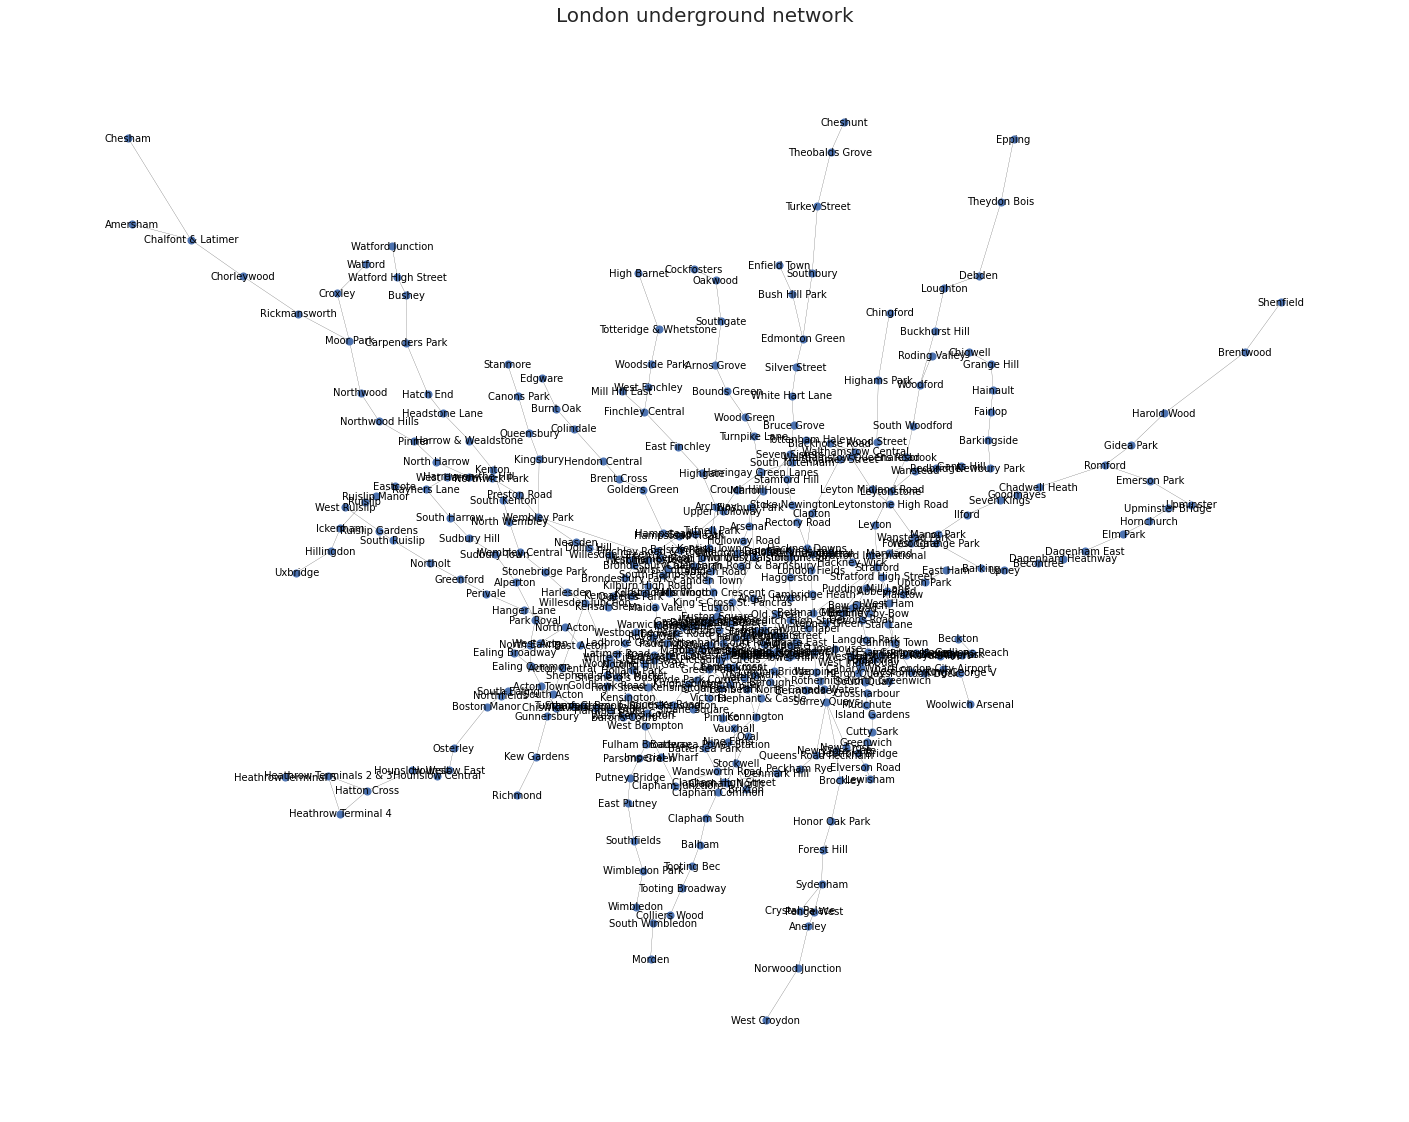

In [24]:
# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

pos = nx.get_node_attributes(G, 'coords')

# Nodes
nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
# Edges
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
# Labels
nx.draw_networkx_labels(G,pos, font_size=10, font_color='black')

plt.title("London underground network",fontsize=20)
plt.axis("off")
plt.show()

**It better to normalized to compare more easily?**

### Centrality measures

**Include eigen vector centrality?**

#### Calculation

In [25]:
df_centrality = pd.DataFrame(index=G.nodes())

deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')
df_centrality['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

clos_london = nx.closeness_centrality(G)
nx.set_node_attributes(G,clos_london,'closeness_t')
df_centrality['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

bet_london = nx.betweenness_centrality(G)
nx.set_node_attributes(G,bet_london,'betweenness_t')
df_centrality['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

eig_london = nx.eigenvector_centrality_numpy(G)
nx.set_node_attributes(G,bet_london,'eigenvector_t')
df_centrality['eigenvector_t'] = pd.Series(nx.get_node_attributes(G, 'eigenvector_t'))
# Change the tolerance value



In [26]:
df_centrality.head(10).sort_values(by=['degree'],ascending=False)

,degree,closeness_t,betweenness_t,eigenvector_t
Stratford,0.0225,0.104384,0.297846,0.297846
Liverpool Street,0.0150,0.110254,0.270807,0.270807
Romford,0.0075,0.059058,0.032774,0.032774
Maryland,0.0050,0.095193,0.063973,0.063973
Forest Gate,0.0050,0.087489,0.059337,0.059337
Manor Park,0.0050,0.080939,0.054700,0.054700
Ilford,0.0050,0.075301,0.050064,0.050064
Seven Kings,0.0050,0.070398,0.045427,0.045427
Goodmayes,0.0050,0.066094,0.040791,0.040791
Chadwell Heath,0.0050,0.062334,0.036217,0.036217


#### Degree centrality

In [27]:
df_centrality['degree'].sort_values(ascending=False)

Stratford                   0.0225
Bank and Monument           0.0200
Baker Street                0.0175
King's Cross St. Pancras    0.0175
Liverpool Street            0.0150
                             ...  
Watford Junction            0.0025
Cockfosters                 0.0025
Stratford International     0.0025
Wimbledon                   0.0025
Stanmore                    0.0025
Name: degree, Length: 401, dtype: float64

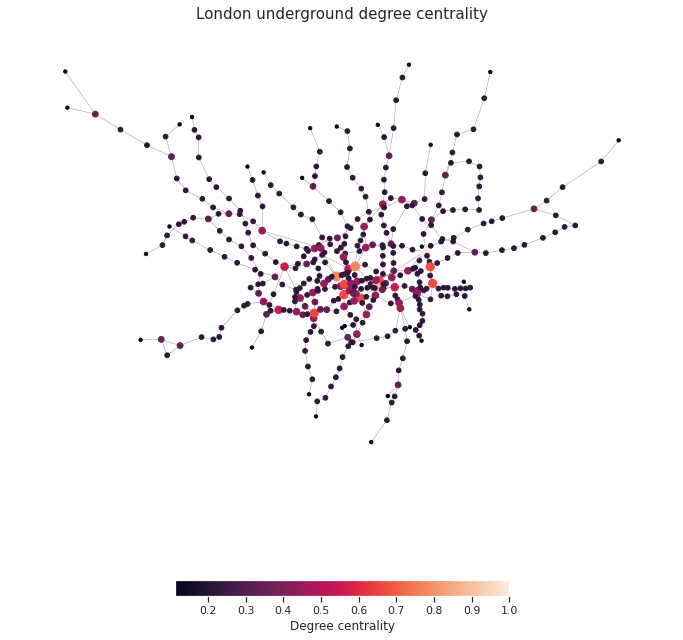

In [28]:
# Plot of degree centrality
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]
# Sclaling using the maximum value of the degree
deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
# Sclaling using the maximum value of the degree and multipling it by 50
deg_size=[(i[1]['degree']/(max(degree_values)))*100 for i in G.nodes(data=True)]


# Plot graph
pos=pos
fig, ax = plt.subplots(figsize=(12,12))
# Edges
nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
# Nodes
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground degree centrality",fontsize=15)
plt.show()

#### Closeness centrality

In [29]:
df_centrality['closeness_t'].sort_values(ascending=False)[0:10]

Green Park                  0.114778
Bank and Monument           0.113572
King's Cross St. Pancras    0.113443
Westminster                 0.112549
Waterloo                    0.112265
Oxford Circus               0.111204
Bond Street                 0.110988
Farringdon                  0.110742
Angel                       0.110742
Moorgate                    0.110314
Name: closeness_t, dtype: float64

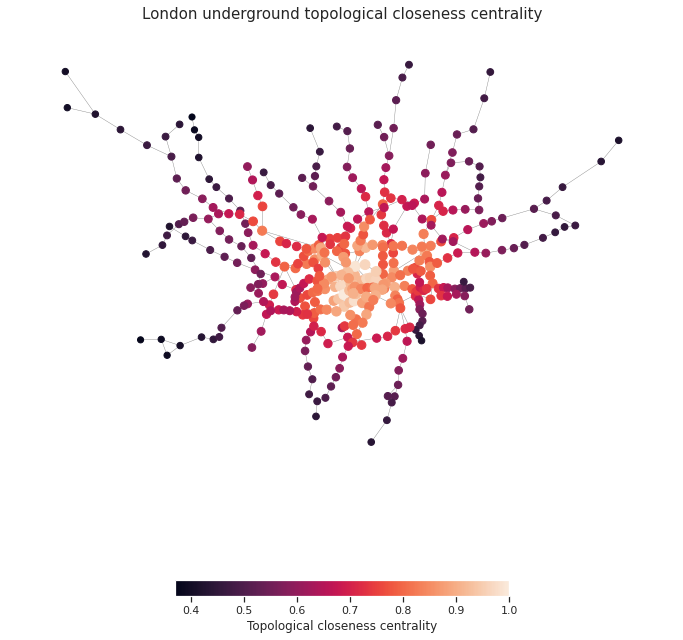

In [30]:
# Lets set color and width of nodes according to the closeness values
close_t_values=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

# close_t_color=[(i[1]['closeness_t']-min(close_t_values))/(max(close_t_values)-min(close_t_values)) for i in G.nodes(data=True)]
# close_t_size=[((i[1]['closeness_t']-min(close_t_values))/(max(close_t_values)-min(close_t_values))*50) for i in G.nodes(data=True)]

close_t_color=[(i[1]['closeness_t']/max(close_t_values)) for i in G.nodes(data=True)]
close_t_size=[(i[1]['closeness_t']/max(close_t_values)*100) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= close_t_color,
        node_size= close_t_size)

plt.colorbar(nod,label="Topological closeness centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground topological closeness centrality",fontsize=15)
plt.show()

#### Betweenness centrality

In [31]:
df_centrality['betweenness_t'].sort_values(ascending=False)[0:10]

Stratford                   0.297846
Bank and Monument           0.290489
Liverpool Street            0.270807
King's Cross St. Pancras    0.255307
Waterloo                    0.243921
Green Park                  0.215835
Euston                      0.208324
Westminster                 0.203335
Baker Street                0.191568
Finchley Road               0.165085
Name: betweenness_t, dtype: float64

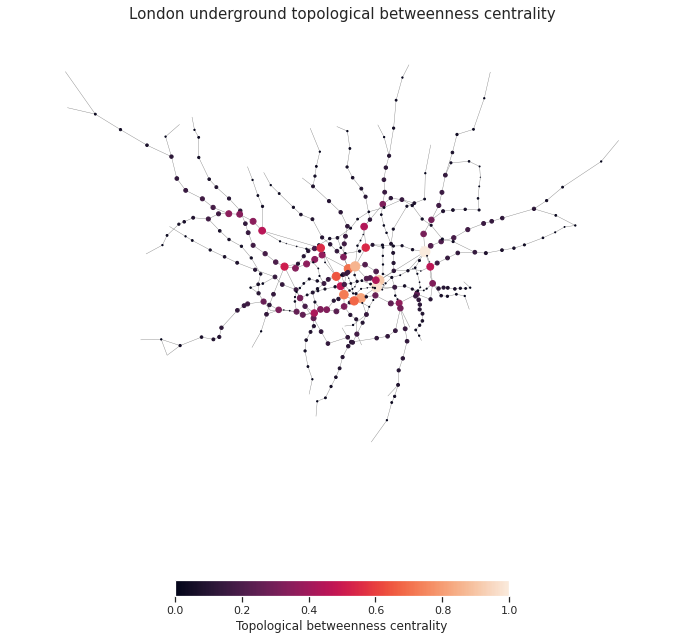

In [32]:
# Lets set colour and size of nodes according to betweenness values
bet_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(bet_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(bet_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Topological betweenness centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground topological betweenness centrality",fontsize=15)
plt.show()

#### Eigenvector  centrality

In [33]:
df_centrality['eigenvector_t'].sort_values(ascending=False)[0:10]

Stratford                   0.297846
Bank and Monument           0.290489
Liverpool Street            0.270807
King's Cross St. Pancras    0.255307
Waterloo                    0.243921
Green Park                  0.215835
Euston                      0.208324
Westminster                 0.203335
Baker Street                0.191568
Finchley Road               0.165085
Name: eigenvector_t, dtype: float64

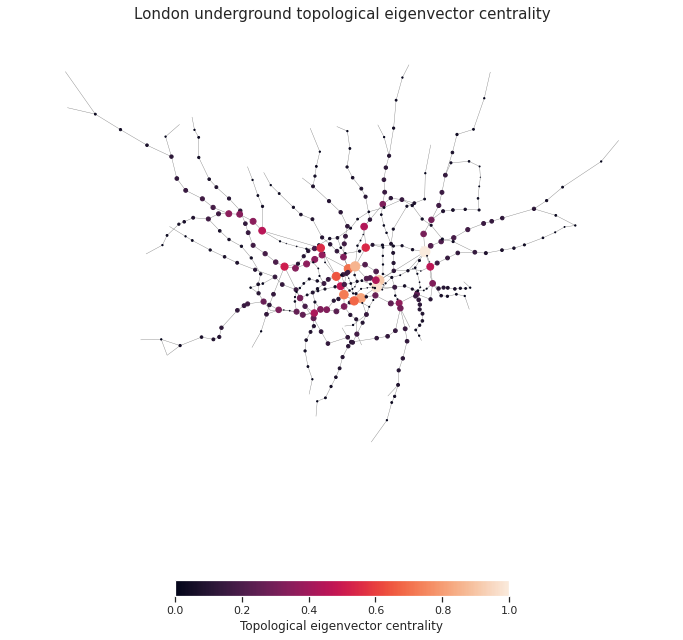

In [34]:
# Eigenvetor centrality
eig_t_values=[(i[1]['eigenvector_t']) for i in G.nodes(data=True)]
eig_t_color=[(i[1]['eigenvector_t']/max(eig_t_values)) for i in G.nodes(data=True)]
eig_t_size=[(i[1]['eigenvector_t']/max(eig_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= eig_t_color, node_size= eig_t_size)

plt.colorbar(nod,label="Topological eigenvector centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground topological eigenvector centrality",fontsize=15)
plt.show()

#### Results summary

In [35]:
df_ranking = pd.DataFrame()
rank = list(range(1, df_centrality.shape[0]+1))
df_ranking['rank'] = rank

degree_rank = df_centrality.sort_values(by='degree',ascending=False).index.values.tolist()
degree_value = df_centrality['degree'].sort_values(ascending=False).values.tolist()
clos_rank = df_centrality.sort_values(by='closeness_t',ascending=False).index.values.tolist()
clos_value = df_centrality['closeness_t'].sort_values(ascending=False).values.tolist()
bet_rank = df_centrality.sort_values(by='betweenness_t',ascending=False).index.values.tolist()
bet_value = df_centrality['betweenness_t'].sort_values(ascending=False).values.tolist()
eig_rank = df_centrality.sort_values(by='eigenvector_t',ascending=False).index.values.tolist()
eig_value = df_centrality['eigenvector_t'].sort_values(ascending=False).values.tolist()


df_ranking['Degree'] = degree_rank
df_ranking['Degree value'] = degree_value
df_ranking['Topological closeness'] = clos_rank
df_ranking['Closeness value'] = clos_value
df_ranking['Topological betweenness'] = bet_rank
df_ranking['Betweenness value'] = bet_value
df_ranking['Topological Eigenvector'] = eig_rank
df_ranking['Eigenvector value'] = eig_value

df_ranking.head(10)


,rank,Degree,Degree value,Topological closeness,Closeness value,Topological betweenness,Betweenness value,Topological Eigenvector,Eigenvector value
0,1,Stratford,0.0225,Green Park,0.114778,Stratford,0.297846,Stratford,0.297846
1,2,Bank and Monument,0.0200,Bank and Monument,0.113572,Bank and Monument,0.290489,Bank and Monument,0.290489
2,3,Baker Street,0.0175,King's Cross St. Pancras,0.113443,Liverpool Street,0.270807,Liverpool Street,0.270807
3,4,King's Cross St. Pancras,0.0175,Westminster,0.112549,King's Cross St. Pancras,0.255307,King's Cross St. Pancras,0.255307
4,5,Liverpool Street,0.0150,Waterloo,0.112265,Waterloo,0.243921,Waterloo,0.243921
5,6,Green Park,0.0150,Oxford Circus,0.111204,Green Park,0.215835,Green Park,0.215835
6,7,Waterloo,0.0150,Bond Street,0.110988,Euston,0.208324,Euston,0.208324
7,8,West Ham,0.0150,Farringdon,0.110742,Westminster,0.203335,Westminster,0.203335
8,9,Oxford Circus,0.0150,Angel,0.110742,Baker Street,0.191568,Baker Street,0.191568
9,10,Canning Town,0.0150,Moorgate,0.110314,Finchley Road,0.165085,Finchley Road,0.165085


In [36]:
# df_ranking.loc[]

### Impact measures

**Nodes**

In [37]:
#list(G.nodes())

**Number of nodes**

In [38]:
G.number_of_nodes()

401

**Diameter**

In [39]:
d=nx.diameter(G)
print(d)

36


**Average shortest path**

In [40]:
asp = nx.average_shortest_path_length(G)
print(asp)

13.545997506234414


**Number of connected components**

In [41]:
nx.number_connected_components(G)

1

**Size of the largest component**

In [42]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G.subgraph(largest_component)

In [43]:
Largest_subgraph.number_of_nodes()

401

In [44]:
type(components)

generator

In [45]:
# You can compute the diameter of the largest component
d_lc = nx.diameter(Largest_subgraph)
d_lc

36

**Size of multiple components**

In [46]:
# To comput the size ( number of node) of each component
Subg = [G.subgraph(c).copy() for c in nx.connected_components(G)]
[len(subgraph.nodes) for subgraph in Subg]

[401]

In [47]:
list([len(subgraph.nodes) for subgraph in Subg])

[401]

In [48]:
type([len(subgraph.nodes) for subgraph in Subg])

list

### Non-sequential node removal

In [49]:
# Copy of the initial network
G_copy = G.copy()

In [50]:
# Create a blank df
non_sq_df = pd.DataFrame()
#Create empy columns
non_sq_df['Nodes'] = np.nan
non_sq_df['Removed nodes'] = np.nan
non_sq_df['Diameter'] = np.nan
non_sq_df['Average shortest path'] = np.nan
non_sq_df['Number of connected components'] = np.nan
non_sq_df['Size of largest connected component'] = np.nan

In [51]:
# List of ranking lists
ranks = [degree_rank, clos_rank, bet_rank, eig_rank]

In [52]:
labels = ['Degree', 'Closeness', 'Betweenness', 'Eigenvector']

In [53]:
# For loop to calculate impact measures in non-sequential node removal
counter = 0
for r in ranks:
    #print(r)
    G_i = G_copy.copy()

    for station in r[0:21]: 
        # Remove a node from the graph
        
        #print(station) 
        #G_i.remove_node(station) # Erasing before the first impact measurement is performed

        # Check if the graph is connected
        if nx.is_connected(G_i):
            # Calculate the number of nodes in the graph
            nodes = nx.number_of_nodes(G_i)
            # Number of removed nodes
            re_nodes = G_copy.number_of_nodes() - G_i.number_of_nodes()
            # Diameter
            diameter = nx.diameter(G_i)
            #Average shortest path of the connected component
            avr_shortest = nx.average_shortest_path_length(G_i)
            # Number of connected componets
            num_con = nx.number_connected_components(G_i)
            # Size of the largest component
            components = nx.connected_components(G_i)
            # Use the max() command to find the largest one:
            largest_component = max(components, key=len)
            # Create a "subgraph" of the largest component
            Largest_subgraph = G.subgraph(largest_component)
            size_lar_com = Largest_subgraph.number_of_nodes()

            # Add the station, number of nodes, and diameter to the DataFrame
            # non_sq = non_sq.append({'Nodes': nodes, 'Removed nodes': re_nodes, 'Diameter for largest component': diameter,'Average shortest path':avr_shortest}, ignore_index=True)
            non_sq_df = pd.concat([non_sq_df, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[counter], 'Number of connected components': num_con, 'Size of largest connected component':size_lar_com})], ignore_index=True)
            G_i.remove_node(station)
        else:
            # Find the largest connected component
            lar_component = max(nx.connected_components(G_i), key=len)
            # Create a subgraph of the largest connected component
            Largest_subgraph = G_i.subgraph(lar_component)
            # Calculate the number of nodes in the subgraph
            nodes = nx.number_of_nodes(G_i)
            # Number of removed nodes
            re_nodes = G_copy.number_of_nodes() - G_i.number_of_nodes()
            # Calculate the diameter of the largest connedted component
            diameter = nx.diameter(Largest_subgraph)
            # Average shortest path of the largest connedted component
            avr_shortest = nx.average_shortest_path_length(Largest_subgraph)
            # Number of connected componets
            num_con = nx.number_connected_components(G_i)
            # Size of the largest component
            size_lar_com = Largest_subgraph.number_of_nodes()
           

            # Add the station, number of nodes, and diameter to the DataFrame
            non_sq_df = pd.concat([non_sq_df, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[counter], 'Number of connected components': num_con, 'Size of largest connected component':size_lar_com})], ignore_index=True)
            G_i.remove_node(station)
        
    counter += 1
        
    #print(counter)
        

In [54]:
non_sq_df.head()

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Centrality measure
0,401.0,0.0,36.0,13.545998,1.0,401.0,Degree
1,400.0,1.0,49.0,14.496447,3.0,379.0,Degree
2,399.0,2.0,49.0,14.872497,3.0,378.0,Degree
3,398.0,3.0,49.0,15.686438,3.0,377.0,Degree
4,397.0,4.0,49.0,17.013376,4.0,374.0,Degree


In [55]:
# #Working code
# fig, [ax1,ax2,ax3,ax4] = plt.subplots(1, 4, sharey=False, tight_layout=True,figsize=(20, 7))
# plt.suptitle('Impact measure - Non-sequential node removal',fontsize=22)
# ax1.set_ylabel("Impact measurement value",fontsize=14)
# sns.lineplot(data=non_sq_df, x="Removed nodes", y="Diameter",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure',linewidth = 2.5)
# sns.lineplot(data=non_sq_df, x="Removed nodes", y="Average shortest path",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)
# sns.lineplot(data=non_sq_df, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=ax3,style='Centrality measure',linewidth = 2.5)
# sns.lineplot(data=non_sq_df, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=ax4,style='Centrality measure',linewidth = 2.5)


# ax1.set_title("Diameter",fontsize=16)
# ax2.set_title("Average shortest path",fontsize=16)
# ax3.set_title("Number of connected components",fontsize=16)
# ax4.set_title("Size of largest connected component",fontsize=16)

# ax2.set_ylabel('')
# ax3.set_ylabel('')
# ax4.set_ylabel('')

# # ax1.set_yticklabels([])
# # ax2.set_yticklabels([]) # remove lable axis
# # ax2.set_yticks([])


# ax1.get_legend().remove()
# ax2.get_legend().remove()
# ax3.get_legend().remove()
# plt.legend(bbox_to_anchor=(1.7, 0.5),loc='center right',title='Centrality\nmeasure',fontsize=14,title_fontsize=16)

# ax1.set_xlabel("Removed nodes",fontsize=14)
# ax2.set_xlabel("Removed nodes",fontsize=14)
# ax3.set_xlabel("Removed nodes",fontsize=14)
# ax4.set_xlabel("Removed nodes",fontsize=14)

# for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
# 	label.set_fontsize(14)

# for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
# 	label.set_fontsize(14)
    
# for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
# 	label.set_fontsize(14)
    
# for label in (ax4.get_xticklabels() + ax4.get_yticklabels()):
# 	label.set_fontsize(14)
    
# # plt.savefig("Dis_line_ratio_meta_M1_M2_M3.jpg",dpi=300)

In [56]:
# Selecting data for plotting
non_sq_df[(non_sq_df['Centrality measure']=='Degree') | (non_sq_df['Centrality measure']=='Betweenness') | (non_sq_df['Centrality measure']=='Eigenvector')].tail()

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Centrality measure
79,385.0,16.0,70.0,22.306943,13.0,285.0,Eigenvector
80,384.0,17.0,70.0,22.306943,14.0,285.0,Eigenvector
81,383.0,18.0,72.0,23.631837,14.0,284.0,Eigenvector
82,382.0,19.0,72.0,23.613688,14.0,283.0,Eigenvector
83,381.0,20.0,43.0,16.671866,15.0,149.0,Eigenvector


In [57]:
# Selecting data for plotting
non_sq_df[(non_sq_df['Centrality measure']=='Degree') | (non_sq_df['Centrality measure']=='Betweenness') | (non_sq_df['Centrality measure']=='Eigenvector')].head()

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Centrality measure
0,401.0,0.0,36.0,13.545998,1.0,401.0,Degree
1,400.0,1.0,49.0,14.496447,3.0,379.0,Degree
2,399.0,2.0,49.0,14.872497,3.0,378.0,Degree
3,398.0,3.0,49.0,15.686438,3.0,377.0,Degree
4,397.0,4.0,49.0,17.013376,4.0,374.0,Degree


In [58]:
# Subsetting the df for plotting
non_sq_df_plot = non_sq_df[(non_sq_df['Centrality measure']=='Degree') | (non_sq_df['Centrality measure']=='Betweenness') | (non_sq_df['Centrality measure']=='Eigenvector')]

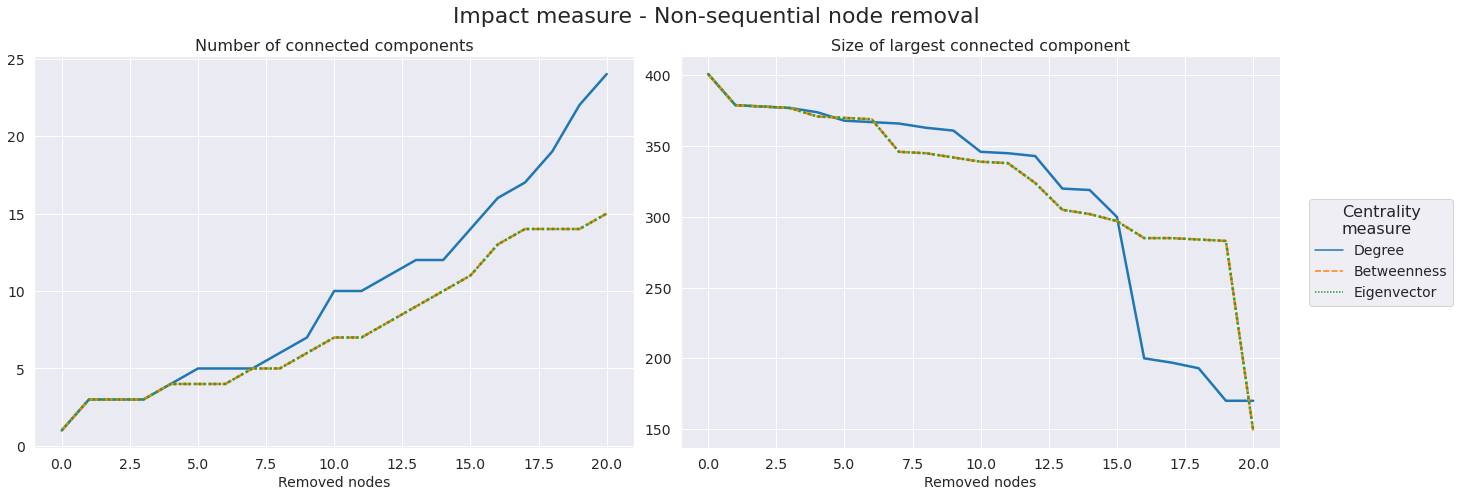

In [59]:
#Plotting just 3 centrality measures
fig, [ax1,ax2] = plt.subplots(1, 2, sharey=False, tight_layout=True,figsize=(20, 7))
plt.suptitle('Impact measure - Non-sequential node removal',fontsize=22)
ax1.set_ylabel("Impact measurement value",fontsize=14)
# sns.lineplot(data=non_sq_df, x="Removed nodes", y="Diameter",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure',linewidth = 2.5)
# sns.lineplot(data=non_sq_df, x="Removed nodes", y="Average shortest path",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=non_sq_df_plot, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=non_sq_df_plot, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)


# ax1.set_title("Diameter",fontsize=16)
# ax2.set_title("Average shortest path",fontsize=16)
ax1.set_title("Number of connected components",fontsize=16)
ax2.set_title("Size of largest connected component",fontsize=16)

ax1.set_ylabel('')
ax2.set_ylabel('')
# ax4.set_ylabel('')

# ax1.set_yticklabels([])
# ax2.set_yticklabels([]) # remove lable axis
# ax2.set_yticks([])


ax1.get_legend().remove()
# ax2.get_legend().remove()
# ax3.get_legend().remove()
plt.legend(bbox_to_anchor=(1.3, 0.5),loc='center right',title='Centrality\nmeasure',fontsize=14,title_fontsize=16)

ax1.set_xlabel("Removed nodes",fontsize=14)
ax2.set_xlabel("Removed nodes",fontsize=14)
# ax3.set_xlabel("Removed nodes",fontsize=14)
# ax4.set_xlabel("Removed nodes",fontsize=14)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
	label.set_fontsize(14)

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
	label.set_fontsize(14)
    
# for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
# 	label.set_fontsize(14)
    
# for label in (ax4.get_xticklabels() + ax4.get_yticklabels()):
# 	label.set_fontsize(14)
    
# plt.savefig("Dis_line_ratio_meta_M1_M2_M3.jpg",dpi=300)

### Sequential node removal

In [60]:
measures = ['degree','closeness','betweenness','eigenvector']

In [61]:
# Define a dictionary of functions
functions_dict = {'degree': nx.degree_centrality,
                  'closeness': nx.closeness_centrality,
                  'betweenness': nx.betweenness_centrality,
                 'eigenvector':nx.eigenvector_centrality_numpy}

In [62]:
# Create a blank df
sq_df = pd.DataFrame()
#Create empy columns
sq_df['Nodes'] = np.nan
sq_df['Removed nodes'] = np.nan
sq_df['Diameter'] = np.nan
sq_df['Average shortest path'] = np.nan
sq_df['Number of connected components'] = np.nan
sq_df['Size of largest connected component'] = np.nan
sq_df['Node removed'] = np.nan

In [63]:
# Working code
counter = 0
for m in measures:
    #print(r)
    G_i = G_copy.copy()
    # print(m)

    for i in range(21): 
        # Remove a node from the graph
        
        # Calculate the centrality measure
        centrality_list = functions_dict[m](G_i)
        max_centrality_node = max(centrality_list, key=centrality_list.get)
        # print(max_centrality_node)
        
        # Check if the graph is connected
        if nx.is_connected(G_i):
            # Calculate the number of nodes in the graph
            nodes = nx.number_of_nodes(G_i)
            # Number of removed nodes
            re_nodes = G_copy.number_of_nodes() - G_i.number_of_nodes()
            # Diameter
            diameter = nx.diameter(G_i)
            #Average shortest path of the connected component
            avr_shortest = nx.average_shortest_path_length(G_i)
            # Number of connected componets
            num_con = nx.number_connected_components(G_i)
            # Size of the largest component
            components = nx.connected_components(G_i)
            # Use the max() command to find the largest one:
            largest_component = max(components, key=len)
            # Create a "subgraph" of the largest component
            Largest_subgraph = G.subgraph(largest_component)
            size_lar_com = Largest_subgraph.number_of_nodes()
        

            # Add the station, number of nodes, and diameter to the DataFrame
            # non_sq = non_sq.append({'Nodes': nodes, 'Removed nodes': re_nodes, 'Diameter for largest component': diameter,'Average shortest path':avr_shortest}, ignore_index=True)
            sq_df = pd.concat([sq_df, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[counter], 'Number of connected components': num_con, 'Size of largest connected component':size_lar_com,'Node removed':max_centrality_node})], ignore_index=True)
            G_i.remove_node(max_centrality_node)
        else:
            # Find the largest connected component
            lar_component = max(nx.connected_components(G_i), key=len)
            # Create a subgraph of the largest connected component
            Largest_subgraph = G_i.subgraph(lar_component)
            # Calculate the number of nodes in the subgraph
            nodes = nx.number_of_nodes(G_i)
            # Number of removed nodes
            re_nodes = G_copy.number_of_nodes() - G_i.number_of_nodes()
            # Calculate the diameter of the largest connedted component
            diameter = nx.diameter(Largest_subgraph)
            # Average shortest path of the largest connedted component
            avr_shortest = nx.average_shortest_path_length(Largest_subgraph)
            # Number of connected componets
            num_con = nx.number_connected_components(G_i)
            # Size of the largest component
            size_lar_com = Largest_subgraph.number_of_nodes()
           

            # Add the station, number of nodes, and diameter to the DataFrame
            sq_df = pd.concat([sq_df, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[counter], 'Number of connected components': num_con, 'Size of largest connected component':size_lar_com,'Node removed':max_centrality_node})], ignore_index=True)
            G_i.remove_node(max_centrality_node)
        
    counter += 1
        
    #print(counter)
        

In [64]:
sq_df.head()

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Node removed,Centrality measure
0,401.0,0.0,36.0,13.545998,1.0,401.0,Stratford,Degree
1,400.0,1.0,49.0,14.496447,3.0,379.0,Bank and Monument,Degree
2,399.0,2.0,49.0,14.872497,3.0,378.0,King's Cross St. Pancras,Degree
3,398.0,3.0,49.0,16.054927,3.0,377.0,Baker Street,Degree
4,397.0,4.0,49.0,17.013376,4.0,374.0,Oxford Circus,Degree


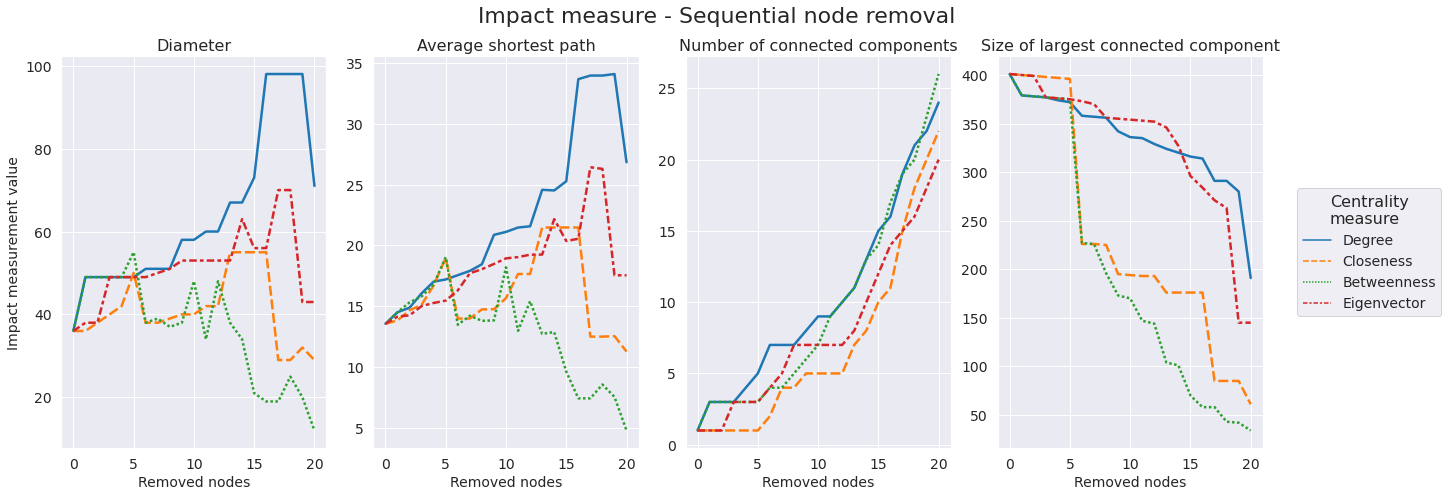

In [65]:
# Working code
# Plot for sequential
fig, [ax1,ax2,ax3,ax4] = plt.subplots(1, 4, sharey=False, tight_layout=True,figsize=(20, 7))
plt.suptitle('Impact measure - Sequential node removal',fontsize=22)
ax1.set_ylabel("Impact measurement value",fontsize=14)
sns.lineplot(data=sq_df, x="Removed nodes", y="Diameter",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure', linewidth = 2.5)
sns.lineplot(data=sq_df, x="Removed nodes", y="Average shortest path",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=sq_df, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=ax3,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=sq_df, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=ax4,style='Centrality measure',linewidth = 2.5)


ax1.set_title("Diameter",fontsize=16)
ax2.set_title("Average shortest path",fontsize=16)
ax3.set_title("Number of connected components",fontsize=16)
ax4.set_title("Size of largest connected component",fontsize=16)

ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')

# ax1.set_yticklabels([])
# ax2.set_yticklabels([]) # remove lable axis
# ax2.set_yticks([])


ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
plt.legend(bbox_to_anchor=(1.7, 0.5),loc='center right',title='Centrality\nmeasure',fontsize=14,title_fontsize=16)

ax1.set_xlabel("Removed nodes",fontsize=14)
ax2.set_xlabel("Removed nodes",fontsize=14)
ax3.set_xlabel("Removed nodes",fontsize=14)
ax4.set_xlabel("Removed nodes",fontsize=14)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
	label.set_fontsize(14)

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
	label.set_fontsize(14)
    
for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
	label.set_fontsize(14)
    
for label in (ax4.get_xticklabels() + ax4.get_yticklabels()):
	label.set_fontsize(14)
    
# plt.savefig("Dis_line_ratio_meta_M1_M2_M3.jpg",dpi=300)

In [66]:
# Selecting data for plotting
sq_df[(sq_df['Centrality measure']=='Degree') | (sq_df['Centrality measure']=='Betweenness') | (sq_df['Centrality measure']=='Eigenvector')].tail()

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Node removed,Centrality measure
79,385.0,16.0,56.0,20.542975,14.0,284.0,Canada Water,Eigenvector
80,384.0,17.0,70.0,26.424409,15.0,271.0,Green Park,Eigenvector
81,383.0,18.0,70.0,26.288393,16.0,263.0,Wembley Park,Eigenvector
82,382.0,19.0,43.0,17.536207,18.0,145.0,Whitechapel,Eigenvector
83,381.0,20.0,43.0,17.536207,20.0,145.0,Notting Hill Gate,Eigenvector


In [67]:
# Selecting data for plotting
sq_df[(sq_df['Centrality measure']=='Degree') | (sq_df['Centrality measure']=='Betweenness') | (sq_df['Centrality measure']=='Eigenvector')].head()

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Node removed,Centrality measure
0,401.0,0.0,36.0,13.545998,1.0,401.0,Stratford,Degree
1,400.0,1.0,49.0,14.496447,3.0,379.0,Bank and Monument,Degree
2,399.0,2.0,49.0,14.872497,3.0,378.0,King's Cross St. Pancras,Degree
3,398.0,3.0,49.0,16.054927,3.0,377.0,Baker Street,Degree
4,397.0,4.0,49.0,17.013376,4.0,374.0,Oxford Circus,Degree


In [68]:
# Subsetting the df for plotting
sq_df_plot = sq_df[(sq_df['Centrality measure']=='Degree') | (sq_df['Centrality measure']=='Betweenness') | (sq_df['Centrality measure']=='Eigenvector')]

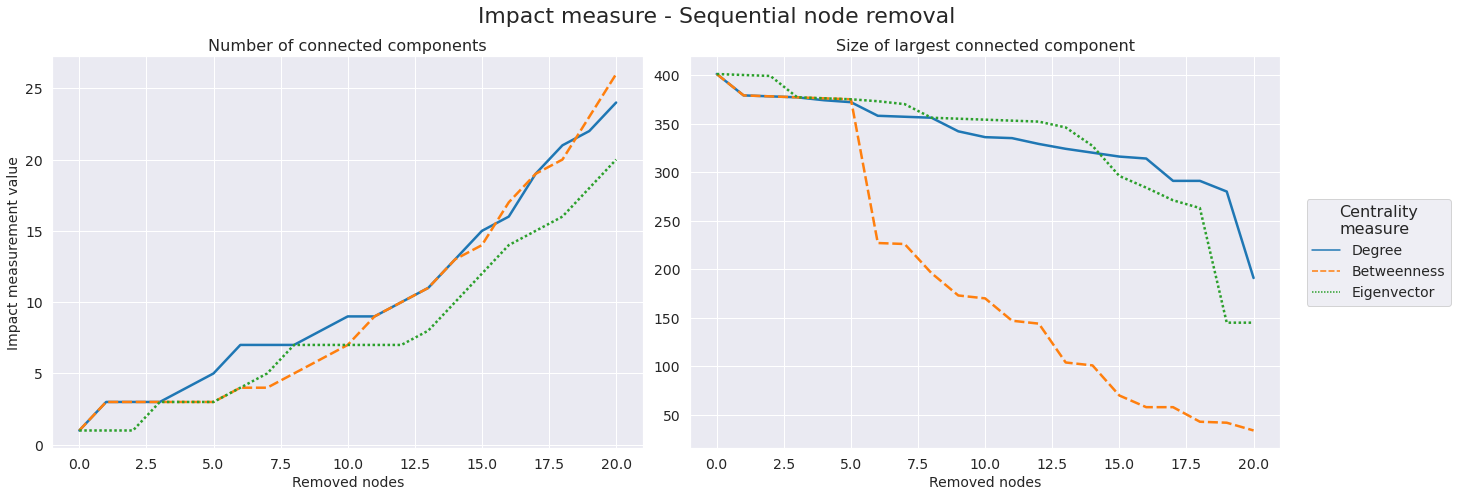

In [69]:
# Testing code
# Plot for sequential for degre, betweenness and eigenvector
fig, [ax1,ax2] = plt.subplots(1, 2, sharey=False, tight_layout=True,figsize=(20, 7))
plt.suptitle('Impact measure - Sequential node removal',fontsize=22)
ax1.set_ylabel("Impact measurement value",fontsize=14)
# sns.lineplot(data=sq_df, x="Removed nodes", y="Diameter",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure', linewidth = 2.5)
# sns.lineplot(data=sq_df, x="Removed nodes", y="Average shortest path",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=sq_df_plot, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=sq_df_plot, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)


# ax1.set_title("Diameter",fontsize=16)
# ax2.set_title("Average shortest path",fontsize=16)
ax1.set_title("Number of connected components",fontsize=16)
ax2.set_title("Size of largest connected component",fontsize=16)

ax2.set_ylabel('')
# ax3.set_ylabel('')
# ax4.set_ylabel('')

# ax1.set_yticklabels([])
# ax2.set_yticklabels([]) # remove lable axis
# ax2.set_yticks([])


ax1.get_legend().remove()
# ax2.get_legend().remove()
# ax3.get_legend().remove()
plt.legend(bbox_to_anchor=(1.3, 0.5),loc='center right',title='Centrality\nmeasure',fontsize=14,title_fontsize=16)

ax1.set_xlabel("Removed nodes",fontsize=14)
ax2.set_xlabel("Removed nodes",fontsize=14)
# ax3.set_xlabel("Removed nodes",fontsize=14)
# ax4.set_xlabel("Removed nodes",fontsize=14)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
	label.set_fontsize(14)

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
	label.set_fontsize(14)
    
# for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
# 	label.set_fontsize(14)
    
# for label in (ax4.get_xticklabels() + ax4.get_yticklabels()):
# 	label.set_fontsize(14)
    
# plt.savefig("Dis_line_ratio_meta_M1_M2_M3.jpg",dpi=300)

**Total results**

In [70]:
plot_labels = ['Degree','Betweenness', 'Eigenvector']

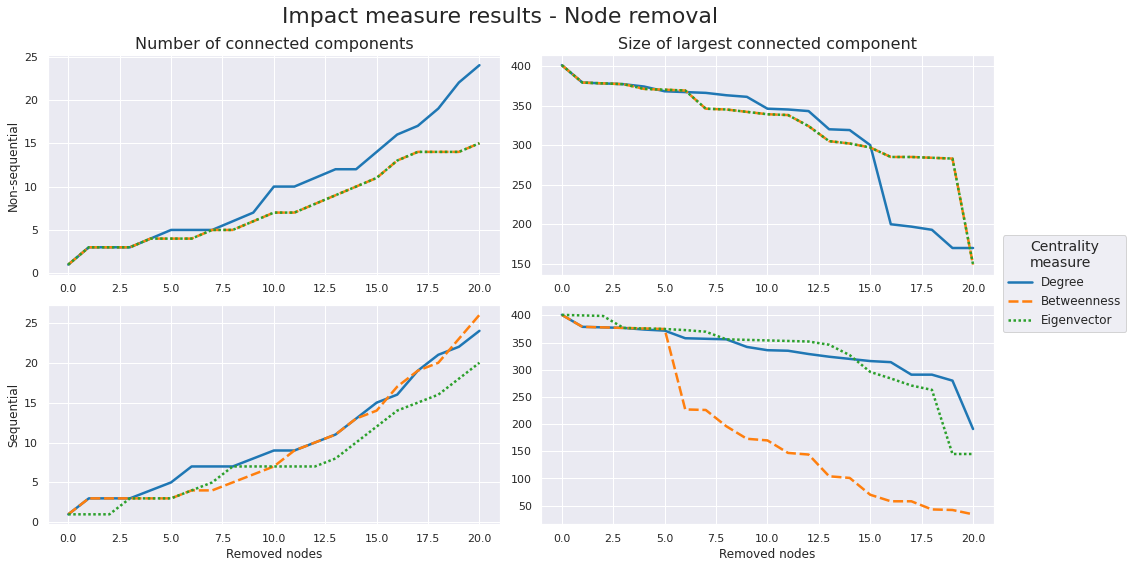

In [71]:
# Plot total results
fig, axes = plt.subplots(2, 2, sharey=False, tight_layout=True,figsize=(14, 8))
plt.suptitle('Impact measure results - Node removal',fontsize=22)
# axes[0,0].set_ylabel("Non-sequential",fontsize=14)
# axes[0,1].set_ylabel("Sequential",fontsize=14)

axes[0,0].set_title("Number of connected components",fontsize=16)
axes[0,1].set_title("Size of largest connected component",fontsize=16)


sns.lineplot(data=non_sq_df_plot, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=axes[0,0],style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=non_sq_df_plot, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=axes[0,1],style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=sq_df_plot, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=axes[1,0],style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=sq_df_plot, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=axes[1,1],style='Centrality measure',linewidth = 2.5)

axes[0,0].set_ylabel('Non-sequential')
axes[0,1].set_ylabel('')
axes[1,0].set_ylabel('Sequential')
axes[1,1].set_ylabel('')

# axes[0,0].get_xaxis().set_visible(False)
# axes[0,1].get_xaxis().set_visible(False)

axes[0,0].get_legend().remove()
axes[0,1].get_legend().remove()
axes[1,0].get_legend().remove()
axes[1,1].get_legend().remove()
axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')

# Change the location of legend
# plt.legend(bbox_to_anchor=(1.45,1),loc='center right',title='Centrality\nmeasure',fontsize=14,title_fontsize=16)
fig.legend(bbox_to_anchor=(1.127,0.5),labels=plot_labels,loc='center right',title='Centrality\nmeasure',fontsize=12,title_fontsize=14)
# fig.legend(bbox_to_anchor=(0.5,-0.09),labels=plot_labels,loc="lower center",ncol=3,title='Centrality measure',fontsize=12,title_fontsize=14)
plt.savefig('Results_Impact_Measures_Total.jpg',dpi=300,bbox_inches='tight')

## Spatial interaction models

### Models and calibration

#### Introduction

#### Parameter calibration

### Scenarios

#### Scenario A

#### Scenario B

#### Scenarios discussion

In [72]:
print('Complete run time: ' + str((timeit.default_timer() - start_time)/60)+' minutes.')

Complete run time: 3.0833226116666688 minutes.
